<a href="https://colab.research.google.com/github/markglewis/learnersAI/blob/master/load_model_tweepy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predict using model trained in binary_classif_stocks
import pickle

load_model = pickle.load(open('save_model/bayes_count.sav','rb'))
count_vect = pickle.load(open('save_model/count_vect.sav','rb'))


In [ ]:
import pandas as pd

dftest = pd.read_csv('../datasets/FiQA/task1_post_ABSA_train_senti.csv',usecols=[1,4])
#dftest = pd.read_csv('../datasets/FiQA/task1_headline_ABSA_train_senti.csv',usecols=[1,4])
#dftest = pd.read_csv('../datasets/dataset1/all-data_senti.csv',usecols=[2,4])

print('\n',dftest.shape)

dftest.dropna(subset=["clean_headline"],inplace=True)

print('')
print('',dftest.shape)

nr = dftest.shape[0]

print('\nnr = ',nr)

print('\n',dftest[['clean_headline','three_senti']].head(5))


 (675, 2)

 (675, 2)

nr =  675

                                       clean_headline  three_senti
0       slowli ad fio got ta care one biggest winner            1
1                          trx long setup macd cross            1
2  optimist amzn fundement chart look like poopoo...           -1
3                   grpn might sell off ahead p earn           -1
4                        iaci look good weekli chart            1


(622, 2)


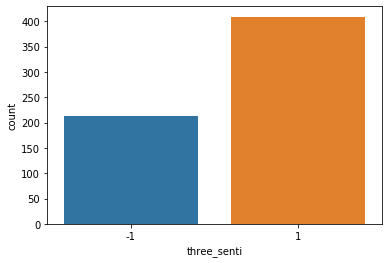

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

idxnames = dftest[ dftest['three_senti']==0 ].index

dftest.drop(idxnames,inplace=True)
print(dftest.shape)

plt.figure(1)
sns.countplot(dftest.three_senti)

plt.show()



In [ ]:
from sklearn import model_selection
import numpy as np

# split the dataset into training and validation datasets 
trainx, validx, trainy, validy = model_selection.train_test_split(dftest['clean_headline'], dftest['three_senti'])

print('\n',isinstance(trainx,list))

print('\n',type(trainx))

print('\nshape = ',np.shape(trainx),np.shape(validx))
print('\nshape = ',np.shape(trainy),np.shape(validy))

print('\n',trainx.iloc[0])
print(trainy.iloc[0])

print('\n',trainx.iloc[3])
print(trainy.iloc[3])


 False

 <class 'pandas.core.series.Series'>

shape =  (466,) (156,)

shape =  (466,) (156,)

 linkedin revenu up nearli lnkd
1

 rt tlt still rise rsi macd bond buy signal bad move market spi uup
-1


In [ ]:
from sklearn import metrics

xtraincount =  count_vect.transform(trainx)
xvalidcount =  count_vect.transform(validx)

print('\nshape = ',np.shape(xtraincount),np.shape(xvalidcount))

predictions = load_model.predict(xvalidcount)
print('\ntest = ',metrics.classification_report(validy,predictions))

predictions = load_model.predict(xtraincount)
print('\ntrain = ',metrics.classification_report(trainy,predictions))


shape =  (466, 18669) (156, 18669)

test =                precision    recall  f1-score   support

          -1       0.65      0.57      0.61        49
           1       0.81      0.86      0.84       107

    accuracy                           0.77       156
   macro avg       0.73      0.72      0.72       156
weighted avg       0.76      0.77      0.76       156


train =                precision    recall  f1-score   support

          -1       0.64      0.56      0.60       164
           1       0.78      0.83      0.80       302

    accuracy                           0.74       466
   macro avg       0.71      0.70      0.70       466
weighted avg       0.73      0.74      0.73       466



In [ ]:
import text_clean as tc


testheadlines = [
                 'TSLA - Cybertruck expected to hit the market strong',
                 'AAPL is social status!! No kids in Jr, and high school in America want android devices, they all want iPhones, and AAPL PRODUCTS!',
                 'Tweet stayed true. MSFT NVDA AMZN AAPL NFLX making new highs, lots of small caps down. Probably will be a trend for the week',
                 'XLK the clear leader today w/ AAPL AMZN MSFT &amp; GOOGL here having good days. We’ll see if the strength continues this week!',
                 'Microsoft MSFT Receives Buy Rating from Fundamental Research',
                 'NVDA dominated by bulls lifting the market higher throughout the day',
                 'AAPL at extension Long or short it with BTC on Trade8',
                 'Seems like a great deal for Facebook Gaming, and a complete failure for Microsoft',
                 'Dow Jones Slides 200 Points On Coronavirus Fears',
                 'Googles U.S. ad revenue projected to fall this year',
                 'Amazon plans facilities in Matteson, Markham',
                 'American whiskey distillers are down $340 million thanks to Trumps trade wars'
                ] 

nr = len(testheadlines)
dftest = pd.DataFrame(columns=['headline','clean_headline'],index=np.arange(nr))

print(dftest.columns.values)

for ii in np.arange(nr):
  txt = testheadlines[ii]
  print('\n--i, txt = ',ii,txt)
  txt =  tc.p.clean(txt)
  txt = tc.remove_pattern(txt)
  txt = tc.replace_chars(txt) 
  dftest.iloc[ii]['clean_headline'] = tc.normalize_doc(txt)
  print(' = ',dftest.iloc[ii]['clean_headline'])

['headline' 'clean_headline']

--i, txt =  0 TSLA - Cybertruck expected to hit the market strong
 =  tsla cybertruck expect hit market strong

--i, txt =  1 AAPL is social status!! No kids in Jr, and high school in America want android devices, they all want iPhones, and AAPL PRODUCTS!
 =  aapl social statu no kid in jr high school in america want android devic want iphon aapl product

--i, txt =  2 Tweet stayed true. MSFT NVDA AMZN AAPL NFLX making new highs, lots of small caps down. Probably will be a trend for the week
 =  tweet stay true msft nvda amzn aapl nflx make new high lot small cap down probabl trend week

--i, txt =  3 XLK the clear leader today w/ AAPL AMZN MSFT &amp; GOOGL here having good days. We’ll see if the strength continues this week!
 =  xlk clear leader today w aapl amzn msft googl good day see strength continu week

--i, txt =  4 Microsoft MSFT Receives Buy Rating from Fundamental Research
 =  microsoft msft receiv buy rate fundament research

--i, txt =  5 NVD

In [ ]:
ser = dftest['clean_headline']

print(type(ser))

#print(type(valid_x))

print('\nsize = ',ser.size,'\n')

for val in ser.values[0:4]:
 print(val)   

ser_count =  count_vect.transform(ser)

print(type(ser_count))

print('\n')

predictions = load_model.predict(ser_count)

ii=0
#for val in ser.values:
for ii in np.arange(nr):
 print('\n tweet, sentiment = ',testheadlines[ii],predictions[ii])
 ii += 1

<class 'pandas.core.series.Series'>

size =  12 

tsla cybertruck expect hit market strong
aapl social statu no kid in jr high school in america want android devic want iphon aapl product
tweet stay true msft nvda amzn aapl nflx make new high lot small cap down probabl trend week
xlk clear leader today w aapl amzn msft googl good day see strength continu week
<class 'scipy.sparse.csr.csr_matrix'>



 tweet, sentiment =  TSLA - Cybertruck expected to hit the market strong 1

 tweet, sentiment =  AAPL is social status!! No kids in Jr, and high school in America want android devices, they all want iPhones, and AAPL PRODUCTS! 1

 tweet, sentiment =  Tweet stayed true. MSFT NVDA AMZN AAPL NFLX making new highs, lots of small caps down. Probably will be a trend for the week 1

 tweet, sentiment =  XLK the clear leader today w/ AAPL AMZN MSFT &amp; GOOGL here having good days. We’ll see if the strength continues this week! 1

 tweet, sentiment =  Microsoft MSFT Receives Buy Rating from Fundam

In [ ]:
import os
import tweepy as tw

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
#search_words = "$AAPL OR $TSLA OR $MSFT OR $FB OR $JNJ OR $CSCO OR $NVDA -filter:retweets"
#search_words = "#AAPL OR AAPL -filter:retweets"
#search_words = "#TSLA -filter:retweets"
search_words = "#TSLA or TSLA or TESLA"
date_since = "2010-06-10"
date_until= "2010-06-10"

In [ ]:
#Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",since=date_since, tweet_mode='extended').items(2000)
print('\n',tweets)

In [ ]:
tweetlst = []

i=0
for tweet in tweets:
 #print(tweet)
 print('\n--------',i,len(tweet.full_text),tweet.created_at, tweet.retweeted, tweet.truncated)
 print('',tweet.source, tweet.retweet_count, tweet.favorite_count)
 print('hashtags = ',tweet.entities.get('hashtags'))
 #print(tweet.text)
 print('!!',tweet.full_text)
 print('**',tc.p.clean(tweet.full_text))
 tweetlst.append(tc.p.clean(tweet.full_text))
 i += 1
    
print('\ni = ',i)
nr = len(tweetlst)


-------- 0 300 2020-06-24 12:51:39 False False
 Twitter Web App 0 1
hashtags =  [{'text': 'TSLA', 'indices': [198, 203]}, {'text': 'Tesla', 'indices': [204, 210]}, {'text': 'OptionsTrading', 'indices': [211, 226]}, {'text': 'technicalanalysis', 'indices': [227, 245]}, {'text': 'money', 'indices': [246, 252]}]
!! $TSLA has broken below key support levels that I mentioned yesterday eve. Will be watching for continuation or a retest of these areas. If it continues lower, I have s/l's 989, 987.7, 983 &amp; 977 #TSLA #Tesla #OptionsTrading #technicalanalysis #money https://t.co/0iJclnAnYj https://t.co/L7VVvSgpGk
** $TSLA has broken below key support levels that I mentioned yesterday eve. Will be watching for continuation or a retest of these areas. If it continues lower, I have s/l's 989, 987.7, 983 &amp; 977 #TSLA #Tesla #OptionsTrading #technicalanalysis #money


NameError: name 'p' is not defined

In [ ]:
dftw = pd.DataFrame(columns=['headline','clean_headline'],index=np.arange(nr))

print(dfdw.columns.values)

for ii in np.arange(nr):
  txt = tweetlst[ii]
  print('\n--i, txt = ',ii,txt)
  txt =  tc.p.clean(txt)
  txt = tc.remove_pattern(txt)
  txt = tc.replace_chars(txt) 
  dftest.iloc[ii]['clean_headline'] = tc.normalize_doc(txt)
  
  print(' = ',dftest.iloc[ii]['clean_headline'])